# COMP5329 Deep Learning A2

#1 Initial Setups

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri May 19 04:26:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.1 Install packages

In [ ]:
!pip install -q efficientnet_pytorch

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.6 MB/s eta 0:00:00


In [ ]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.6 MB/s eta 0:00:00


In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=96452d5d59eec3c3081e0a530e9702696e24925ce02f358a5825894f9883b579
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


## 1.2 Loading Libraries

In [ ]:
# libraries for the files in google drive
import os
import re
import cv2
from io import StringIO
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
import random
from random import randint
import string
import itertools
import zipfile

import wandb
from sklearn.metrics import f1_score
import torch.optim as optim
import time
import seaborn as sns
from datasets import load_dataset, load_metric
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
from dataclasses import dataclass
from typing import Optional, Tuple, List

import torch
import torch.nn as nn
from torch.utils.data import dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from efficientnet_pytorch import EfficientNet
from torchvision.models import resnet18
from torchvision.models import alexnet as alexnet_fn

In [ ]:
from transformers.file_utils import ModelOutput
from transformers import get_linear_schedule_with_warmup
from transformers import PretrainedConfig, PreTrainedModel, BertModel, BertTokenizer, AutoModel, AutoConfig
from transformers import DistilBertModel, DistilBertTokenizer
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms import RandomRotation, RandomErasing, ColorJitter,RandomApply,CenterCrop,Compose,ToTensor,Resize,RandomHorizontalFlip,RandomVerticalFlip,Normalize
from transformers import AutoTokenizer

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [ ]:

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

## 1.3 Importing ASM2 file paths.


In [ ]:
# https://drive.google.com/file/d/1fONsOWgKr46V5aqqEtuAjw02NRKo4qg4/view?usp=share_link

# Authenticating Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Downloading and extracting the dataset
zip_file = drive.CreateFile({'id': '1fONsOWgKr46V5aqqEtuAjw02NRKo4qg4'})
zip_file.GetContentFile('multi-label-classification-competition-2023.zip')

with zipfile.ZipFile('multi-label-classification-competition-2023.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

data_dir = 'dataset/COMP5329S1A2Dataset'
def add_path(path):
  with open(path) as file:
      lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
  df = pd.read_csv(StringIO(''.join(lines)), escapechar='/')
  df["image_path"] = data_dir + "/data/" + df['ImageID']
  return df

# Loading train and test datasets with file paths
train_csv = add_path(os.path.join(data_dir, "train.csv"))
test_csv = add_path(os.path.join(data_dir, "test.csv"))

# 2 Data Preprocessing & Visualization

## 2.1 Dataset Preprocessing

Inspecting the data structure of the ASM2 dataset

In [ ]:
# Display first 3 rows of train_csv
display(train_csv.head(3))
print("\n")
# Display first 3 rows of test_csv
display(test_csv.head(3))

,ImageID,Labels,Caption,image_path
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.,dataset/COMP5329S1A2Dataset/data/0.jpg
1,1.jpg,1 19,A couple of men riding horses on top of a gree...,dataset/COMP5329S1A2Dataset/data/1.jpg
2,2.jpg,1,They are brave for riding in the jungle on tho...,dataset/COMP5329S1A2Dataset/data/2.jpg


,ImageID,Caption,image_path
0,30000.jpg,A little girl waring a krispy kreme hat holdin...,dataset/COMP5329S1A2Dataset/data/30000.jpg
1,30001.jpg,A beautiful young woman holding an orange fris...,dataset/COMP5329S1A2Dataset/data/30001.jpg
2,30002.jpg,A group of people sitting on couch next to a c...,dataset/COMP5329S1A2Dataset/data/30002.jpg


### 2.1.1 Distribution of labels

Through visualization methods, it is observed that label 12 is missing and label 1 is overly dominant. We could consider addressing this by simplifying the implementation, which will be done in the latter part and handled together with the dataloader.

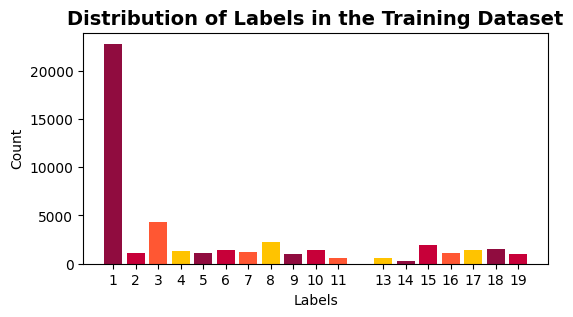

In [ ]:
def process_labels(df):
    df["labels"] = df["Labels"].apply(lambda x: [int(label) for label in x.split()] if isinstance(x, str) else x)
    return df

# Processing the 'labels' column for the training and testing data.
process_labels(train_csv)

def plot_label_distribution(df, title):
    all_labels = np.concatenate(df["labels"].values)
    unique_labels, counts = np.unique(all_labels, return_counts=True)
    
    # Create gradient colors
    cmap = ListedColormap(['#FFC300', '#FF5733', '#C70039', '#900C3F'])
    gradient = np.linspace(0, 1, 4)
    color = [cmap(x) for x in gradient[::-1]]  # Reverse gradient for dark colors
    
    # Plot bar chart with gradient colors
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(unique_labels, counts, color=color)
    ax.set_xlabel('Labels')
    ax.set_xticks(unique_labels)
    ax.set_ylabel('Count')
    ax.set_title(title, fontsize=14, fontweight='bold')
    plt.show()

# Example usage
plot_label_distribution(train_csv, "Distribution of Labels in the Training Dataset")

#### 2.1.1.1 idtolabel

In [ ]:
'''
labels = set(label.strip() for labels in train_csv.Labels.values for label in labels.split())
idtolabel = {i:label for i,label in enumerate(labels)}
print(idtolabel)
'''
# Get unique labels from the training dataset
labels = sorted(set(int(label.strip()) for labels in train_csv.Labels.values for label in labels.split()))

# Create a mapping from label index to label name
idtolabel = {i:str(label) for i,label in enumerate(labels)}
print(idtolabel)


{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '13', 12: '14', 13: '15', 14: '16', 15: '17', 16: '18', 17: '19'}


### 2.1.2 Splitting the dataset into train/validation/test sets

In [ ]:
# split training into trianing dataset and validation dataset
def train_val_split(X, val_ratio):
  np.random.seed(5329) #10
  shuffled_indices = np.random.permutation(len(X))
  val_set_size = int(len(X) * val_ratio)
  val_indices = shuffled_indices[: val_set_size]
  train_indices = shuffled_indices[val_set_size:]
  return X.iloc[train_indices],X.iloc[val_indices],train_indices,val_indices

train_set, val_set, train_indices, val_indices = train_val_split(train_csv,0.20)
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)

print(f"Train_Data Length: {len(train_set)}\nValidation_Data Length: {len(val_set)}")
print("Train:", train_set.shape)
print("Validation:", val_set.shape)
print("Test:", test_csv.shape)

Train_Data Length: 23997
Validation_Data Length: 5999
Train: (23997, 5)
Validation: (5999, 5)
Test: (10000, 3)


## 2.2 build Asm2Dataset Class

In [ ]:
class Preprocessing(dataset.Dataset):
  def __init__(self, dataframe=None, tokenizer=None, transform=None, include_labels=False):
    self.dataframe = dataframe.reset_index(drop=True)
    self.tokenizer = tokenizer
    self.transform = transform
    self.include_labels = include_labels

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, index):
    image_caption = self.dataframe.loc[index, "Caption"]
    image_path = self.dataframe.loc[index, "image_path"]
    image = Image.open(image_path).convert('RGB')

    # Apply image transformations
    transformed_image = self.transform(image)

    # Process caption
    tokenized_inputs = self.tokenizer(image_caption, max_length=24, padding="max_length", truncation=True, return_tensors="pt")
    tokenized_inputs = {key: value.squeeze(0) for key, value in tokenized_inputs.items()}
    
    # Process labels
    if self.include_labels:
      label_string = self.dataframe.loc[index, "Labels"]
      label_list = [label.strip() for label in label_string.split()]
      binary_labels = [int(label in label_list) for label in idtolabel.values()]
      tokenized_inputs["labels"] = torch.tensor(binary_labels, dtype=torch.float32)

    tokenized_inputs["image"] = transformed_image
    return tokenized_inputs


## 2.3 Image processing
By examining the images, we can observe variations in their sizes. To address this, we can calculate the mean and std of the images and use them for normalization during transformation.

### 2.3.1 Images Visualization

In [ ]:
random.seed(10)

def ImageShow(dataset,title):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8)) # facecolor='#F7E7CE'
    fig.suptitle(title, fontsize=20, fontweight='bold')
    
    for i in range(4):
        ax = axes[i]

        idx = random.randint(0, len(dataset) - 1)
        img_path = dataset.loc[idx]["image_path"]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel("ImageID: " + dataset.loc[idx]["ImageID"] + "\nCaption: " + dataset.loc[idx]["Caption"], fontsize=10)
        ax.xaxis.label.set_wrap(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

print('showing the traning image dataset below:')
ImageShow(train_csv,"Some examples of the traning images")

print('\nshowing the testing image dataset below:')
ImageShow(test_csv,"Some examples of the testing images")

Output hidden; open in https://colab.research.google.com to view.

### 2.3.2 Calculate mean, std for normalization


In [ ]:
transforms = Compose([
    ToTensor(),
])

# Preprocess the dataset for normalization
dataset_for_normalize = Preprocessing(dataframe=train_set, tokenizer=tokenizer, transform=transforms, include_labels=True)
#print(dataset_for_normalize[2])

# Create a dataloader for the normalized dataset
dataloader_for_normalize = DataLoader(dataset_for_normalize, batch_size=1, shuffle=True)

sum_channels, sumsq_channels, n_batches = 0, 0, 0

# Calculate the mean and standard deviation for normalization
for step, batch in enumerate(dataloader_for_normalize):
    images = batch['image']
    sum_channels += torch.mean(images, dim=[0, 2, 3])
    sumsq_channels += torch.mean(images ** 2, dim=[0, 2, 3])
    n_batches += 1

mean = sum_channels / n_batches
std = torch.sqrt(sumsq_channels / n_batches - mean ** 2)

print(f'Mean is: {mean} \nStandard Deviation is: {std}')


Mean is: tensor([0.4635, 0.4487, 0.4217]) 
Standard Deviation is: tensor([0.2726, 0.2698, 0.2848])


## 2.4 Data Augmentation

### 2.4.1 Data Augmentation definition

In [ ]:

from torchvision.transforms import AutoAugment, AutoAugmentPolicy
class DataAugmentation:
    def __init__(self, include_labels=False):
        """
        Data augmentation class for image preprocessing.

        Args:
            include_labels (bool): Whether to include labels in the transformation.
        """
        self.transforms = Compose([
            Resize((256, 256), antialias=True),
            CenterCrop(224),
            #RandomHorizontalFlip(p=0.7),
            #RandomVerticalFlip(p=0.3),
            #RandomApply([RandomRotation(degrees=(-10, 10))], p=0.5),
            AutoAugment(AutoAugmentPolicy.IMAGENET),
            #ColorJitter(brightness=0.1, contrast=0.15),  
            ToTensor(),
            #RandomErasing(p=0.1, scale=(0.01, 0.2), ratio=(0.3, 2.0), value=0, inplace=False),
            Normalize(mean=mean, std=std),
        ])
        self.include_labels = include_labels
        
    def apply(self, image):
        """
        Apply the data augmentation transforms to the input image.

        Args:
            image: Input image.

        Returns:
            Transformed image.
        """
        return self.transforms(image)

    def __call__(self, image):
        """
        Apply the data augmentation transforms to the input image.

        Args:
            image: Input image.

        Returns:
            Transformed image.
        """
        transformed_image = self.apply(image)
        return transformed_image


transform_fortest = Compose([
    Resize((256, 256), antialias=True),
    CenterCrop(224),
    ToTensor(),
    Normalize(mean=mean, std=std),
])

### 2.4.2 Displaying Random Images after Data Augmentation

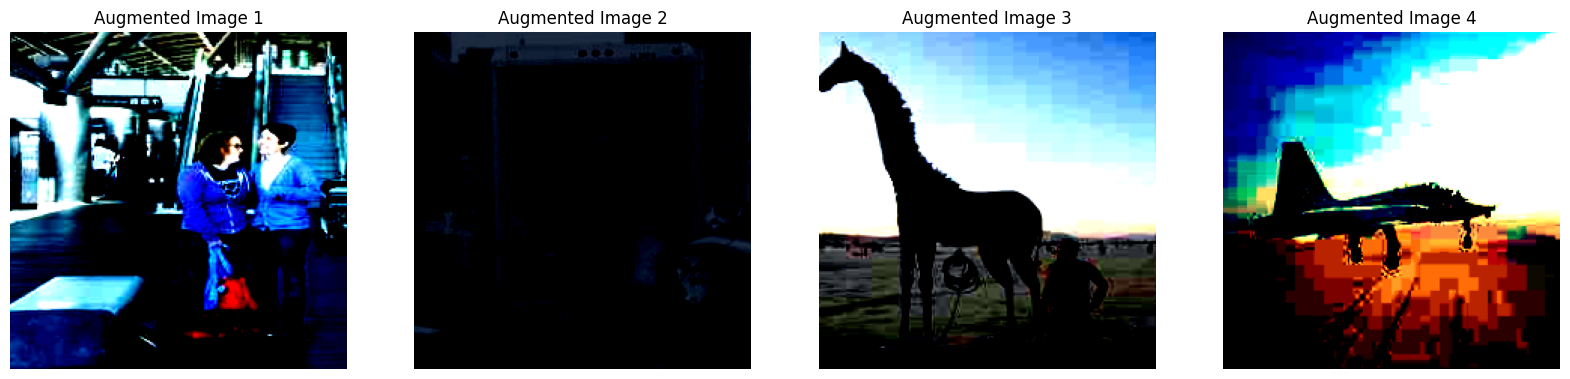

In [ ]:

data_augmentation = DataAugmentation(include_labels=True)

def show_random_augmented_images(dataset, data_augmentation, num_images=4):
    plt.figure(figsize=(20, 5))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)

        random_index = np.random.randint(len(dataset))
        random_image_path = dataset.iloc[random_index]["image_path"]
        image = Image.open(random_image_path)
        augmented_image = data_augmentation.apply(image)

        # Convert torch.Tensor to numpy.ndarray and transpose
        augmented_image_np = augmented_image.numpy().transpose(1, 2, 0)
        
        # Limiting data within valid range
        augmented_image_np = np.clip(augmented_image_np, 0, 1)

        plt.imshow(augmented_image_np)
        plt.axis('off')
        plt.title(f"Augmented Image {i+1}")

    plt.show()

# Visualizing augmented images
show_random_augmented_images(train_csv, data_augmentation)


# 3 Training model Definition

## 3.1 Creating Train/Test/Validation Datasets

In [ ]:

batch_size = 32

# train_ds with data augmentation
train_ds = Preprocessing(dataframe=train_set, tokenizer=tokenizer, transform=DataAugmentation(include_labels=True), include_labels=True)

# train_ds without data augmentation
#train_ds = Preprocessing(dataframe=train_set, tokenizer=tokenizer, transform=transform_fortest, include_labels=True)

val_ds = Preprocessing(dataframe=val_set, tokenizer=tokenizer, transform=transform_fortest, include_labels=True)
test_ds = Preprocessing(dataframe=test_csv, tokenizer=tokenizer, transform=transform_fortest, include_labels=False)

# train_loader with non-Simpler 
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

## 3.2 Weighted Random Sampler - not used

In [ ]:
'''
from torch.utils.data.sampler import WeightedRandomSampler

def get_class_weights(labels_list):
    all_labels = np.concatenate([labels.split() for labels in labels_list])
    unique_labels, counts = np.unique(all_labels, return_counts=True)
    # Calculate class weights based on the occurrence counts
    class_weights = {label: 1.0/np.log1p(count) for label, count in zip(unique_labels, counts)}  # 1.0/np.log1p(count)
    return class_weights

def get_sample_weights(dataset, class_weights):
    sample_weights = []
    for _, row in dataset.iterrows():
        labels = row['Labels'].split()
        # Calculate the average weight for the labels in each row
        sample_weight = np.mean([class_weights[label] for label in labels])
        sample_weights.append(sample_weight)
    return sample_weights

train_class_weights = get_class_weights(train_set['Labels'])
train_sample_weights = get_sample_weights(train_set, train_class_weights)
train_sampler = WeightedRandomSampler(train_sample_weights, num_samples=len(train_sample_weights), replacement=True)

# train_loader with Simpler 
train_loader = DataLoader(train_ds, batch_size=batch_size, sampler=train_sampler)
'''

## 3.3 Training Definition

In [ ]:

def train_loop(dataloader, model, loss_fn, optimizer, scheduler, device, threshold=0.5, eval_every=50):
    size = len(dataloader.dataset)
    model.train()
    best_f1 = None 
    train_losses = []
    val_losses = []
    val_f1s = []

    for batch_idx, batch in enumerate(dataloader):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        model.zero_grad()

        outputs = model(**inputs)

        loss = loss_fn(outputs.logits, labels.type(torch.float))
        loss.backward()

        optimizer.step()
        scheduler.step()

        train_losses.append(loss.item())
        
        if batch_idx % eval_every == 0:
            # Evaluate the model on the validation set
            val_loss, val_f1 = evaluate(val_loader, model, loss_fn, device, threshold)
            print(f"[{batch_idx * dataloader.batch_size:>5d}/{size:>5d}] Train loss: {loss.item():.6f}, Validation loss: {val_loss:.6f}, Micro F1: {val_f1:.6f}")
            
            val_losses.append(val_loss)
            val_f1s.append(val_f1)
            
            if best_f1 is None or val_f1 > best_f1:  # Checking if best_model needs to be updated
                torch.save(model.state_dict(), save_model_path)
                best_f1 = val_f1
    
    return train_losses, val_losses, val_f1s

def evaluate(dataloader, model, loss_fn, device, threshold=0.5):
    size = len(dataloader.dataset)
    model.eval()
    val_losses = []
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs)

            loss = loss_fn(outputs.logits, labels.type(torch.float))
            val_losses.append(loss.item())

            preds = torch.sigmoid(outputs.logits)
            preds = (preds > threshold).float()

            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = torch.cat(all_preds, dim=0)
    all_labels = torch.cat(all_labels, dim=0)
    val_f1 = f1_score(all_labels.cpu().numpy(), all_preds.cpu().numpy(), average='micro')
    
    return sum(val_losses) / len(val_losses), val_f1


## 3.4 Config definition

In [ ]:
class ModelConfig(PretrainedConfig):
    def __init__(
        self,
        combined_model_type: str = "efficientnet_bert-base-uncased",
        nlp_model: str = "bert-base-uncased",
        cnn_model: str = "efficientnet-b0",
        num_labels: int = 18,
        dropout: float = 0.3,
        inner_dim: int = 1024,
        max_length: int = 256,
        **kwargs
    ):
        super(ModelConfig, self).__init__(num_labels=num_labels,
                                     **kwargs)
        # Initialize ModelConfig with the provided parameters
        self.combined_model_type = combined_model_type
        self.nlp_model = nlp_model
        self.cnn_model = cnn_model
        self.dropout = dropout
        self.inner_dim = inner_dim # Inner dimension for the combined model
        self.max_length = max_length # Maximum input length

        # Get the configuration of the NLP model
        encoder_config = AutoConfig.from_pretrained(
            self.nlp_model,
        )
        self.vocab_size = encoder_config.vocab_size
        self.eos_token_id = encoder_config.eos_token_id # ID of the end-of-sentence token

# 4 Efficientnet

## 4.1 config

In [ ]:

eff_config = ModelConfig(
    combined_model_type="efficientnet_bert-base-uncased",
    nlp_model="bert-base-uncased",
    cnn_model="efficientnet-b0",
    num_labels=18,
    dropout= 0.5,
    inner_dim=1024,
    max_length=256,
)


## 4.2 Model Definition

In [ ]:
class EfficientNetClassifier(nn.Module):
    """
    Custom Classifier that includes both EfficientNet and BERT models for multi-modal inputs.

    Args:
        efficientnet (nn.Module): The EfficientNet model for image processing.
        bert (nn.Module): The BERT model for text processing.
        fc_layers (nn.Module): The Fully Connected layers for classification.
        dropout (nn.Module): The Dropout layer for regularization.
    """
    def __init__(self, efficientnet, bert, fc_layers, dropout):
        super(EfficientNetClassifier, self).__init__()
        self.efficientnet = efficientnet
        self.bert = bert
        self.fc_layers = fc_layers
        self.dropout = dropout

    def forward(self, input_ids, attention_mask, image):
        """
        The forward pass for the classifier.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            logits (torch.Tensor): The output logits after processing through the EfficientNet, BERT, and FC layers.
        """
        image_encoded = self.efficientnet(image)
        encoded = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        x = torch.cat((image_encoded, encoded.last_hidden_state[:,0,:]), dim=-1)
        x = self.fc_layers(x)
        logits = self.dropout(x)
        return logits


class EfficientNetModel(PreTrainedModel):
    """
    The implementation of a pre-trained model that combines features from EfficientNet 
    and BERT.

    Args:
        config (ModelConfig): The configuration object containing model parameters.
    """
    def __init__(self, config: ModelConfig):
        super(EfficientNetModel, self).__init__(config)
        self.config = config
        
        efficientnet = EfficientNet.from_pretrained(self.config.cnn_model)
        bert = AutoModel.from_pretrained(self.config.nlp_model)
        bert.resize_token_embeddings(self.config.vocab_size)
        
        fc_layers = nn.Sequential(
            nn.Linear(bert.config.hidden_size + 1000, self.config.inner_dim),
            nn.ReLU(),
            nn.Linear(self.config.inner_dim, self.config.num_labels)
        )
        dropout = nn.Dropout(self.config.dropout)
        self.model = EfficientNetClassifier(efficientnet, bert, fc_layers, dropout)

    def resize_token_embeddings(self, new_num_tokens):
        """
        Resize the token embeddings of the BERT model. 

        Args:
            new_num_tokens (int): The new size of the vocabulary.

        """
        self.model.bert.resize_token_embeddings(new_num_tokens)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, 
                labels=None, image=None, return_dict=None, **kwargs):
        """
        The forward pass for the model.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            token_type_ids (torch.Tensor): The token type ids for text.
            labels (torch.Tensor): The true labels for the input.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            Output (ModelOutput): The output object containing loss (if labels provided) and logits.
        """
        logits = self.model(input_ids, attention_mask, image)
        loss = None

        if labels is not None:
            loss_function = nn.BCEWithLogitsLoss()
            loss = loss_function(logits, labels)
        
        return Output(
             loss=loss,
            logits=logits,
        )

@dataclass
class Output(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None


In [ ]:
eff_model = EfficientNetModel(eff_config)

Loaded pretrained weights for efficientnet-b0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 4.3 Evaluation

### 4.3.1 Training

In [ ]:
eff_model = eff_model.to(device)

EVAL_EVERY = 50
loss_fn = nn.BCEWithLogitsLoss()
#loss_fn = nn.MultiLabelSoftMarginLoss()

num_epochs = 3 # 5
learning_rate = 0.0001
weight_decay = 0.01

best_f1 = None  # Saving the best model
save_model_path = "best_model.pt"  # Path to save the best model

optimizer = optimizer = optim.Adadelta(eff_model.parameters())
#optimizer = optim.AdamW(eff_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Setting up the scheduler
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

ENC_train_losses = []
ENC_val_losses = []
ENC_f1s = []

t0 = time.time()
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}/{num_epochs}")
    train_losses, val_losses, val_f1s = train_loop(train_loader, eff_model, loss_fn, optimizer, scheduler, device)
    ENC_train_losses += train_losses
    ENC_val_losses += val_losses
    ENC_f1s += val_f1s
t1 = time.time()
training_time = t1 - t0

Epoch: 1/3
[    0/23997] Train loss: 0.687909, Validation loss: 0.683796, Micro F1: 0.159222
[ 1600/23997] Train loss: 0.184885, Validation loss: 0.165259, Micro F1: 0.605328
[ 3200/23997] Train loss: 0.114136, Validation loss: 0.129837, Micro F1: 0.683552
[ 4800/23997] Train loss: 0.166634, Validation loss: 0.123138, Micro F1: 0.732522
[ 6400/23997] Train loss: 0.131001, Validation loss: 0.101923, Micro F1: 0.774347
[ 8000/23997] Train loss: 0.096886, Validation loss: 0.091799, Micro F1: 0.807214
[ 9600/23997] Train loss: 0.072424, Validation loss: 0.084597, Micro F1: 0.823686
[11200/23997] Train loss: 0.097111, Validation loss: 0.089699, Micro F1: 0.823298
[12800/23997] Train loss: 0.089607, Validation loss: 0.081823, Micro F1: 0.834628
[14400/23997] Train loss: 0.058186, Validation loss: 0.084418, Micro F1: 0.817818
[16000/23997] Train loss: 0.058942, Validation loss: 0.078649, Micro F1: 0.838041
[17600/23997] Train loss: 0.100296, Validation loss: 0.078856, Micro F1: 0.841296
[1920

In [ ]:
print("Training time: {:.6f}".format(training_time))

Training time: 2807.677146


### 4.3.2 Training Results Visualization

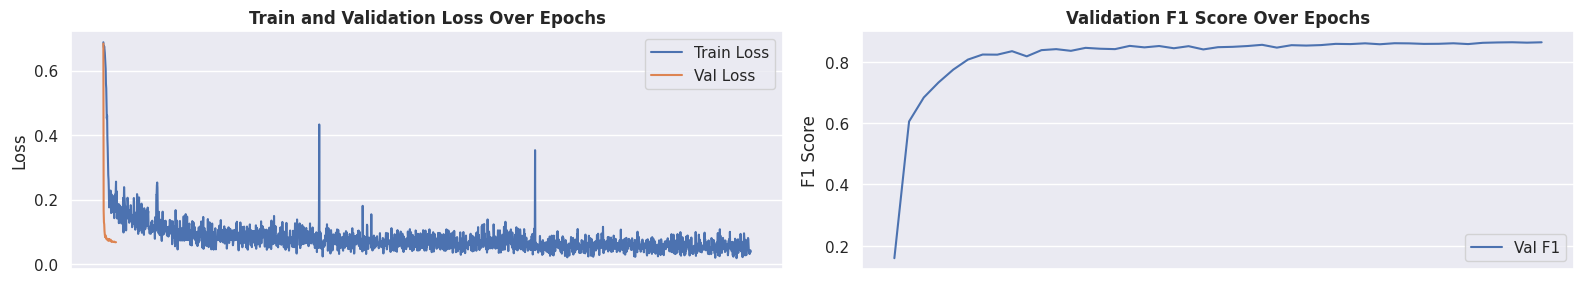

In [ ]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

# Plotting training loss and validation loss
sns.lineplot(ax=axes[0], data=ENC_train_losses, label='Train Loss')
sns.lineplot(ax=axes[0], data=ENC_val_losses, label='Val Loss')
axes[0].set_xticks([])
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Train and Validation Loss Over Epochs', fontweight='bold')

# Plotting validation F1 score
sns.lineplot(ax=axes[1], data=ENC_f1s, label='Val F1')
axes[1].set_xticks([])
axes[1].set_ylabel('F1 Score')
axes[1].legend()
axes[1].set_title('Validation F1 Score Over Epochs', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3.3 Testing


In [ ]:

test_model = EfficientNetModel(eff_config)
# Loading model parameters
test_model.load_state_dict(torch.load("best_model.pt"))
test_model = test_model.to(device)
test_model.eval()

predicted_labels = []
total_batches = len(test_loader)

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = test_model(**batch)
        probs = torch.sigmoid(outputs.logits.cpu())
        predictions = np.zeros_like(probs)
        predictions[np.where(probs >= 0.5)] = 1
        # turn predicted id's into actual label names
        for preds in predictions:
            predicted_labels.append(" ".join([idtolabel[idx] for idx, label
                                              in enumerate(preds) if label == 1.0]))

test_csv["Labels"] = predicted_labels


Loaded pretrained weights for efficientnet-b0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
display(test_csv[["ImageID", "Labels"]].head(20))

,ImageID,Labels
0,30000.jpg,1
1,30001.jpg,1
2,30002.jpg,1
3,30003.jpg,1
4,30004.jpg,1
5,30005.jpg,1
6,30006.jpg,11
7,30007.jpg,9
8,30008.jpg,1 9
9,30009.jpg,1


In [ ]:
with open("Predicted_labels.txt", "w") as f:
    for index, row in test_csv.iterrows():
        f.write(f"{row['ImageID']} {row['Labels']}\n")

In [ ]:
test_csv[["ImageID", "Labels"]].to_csv("Predicted_labels.csv", index=False)

# 5 ResNet

## 5.1 Config

In [ ]:
res_config = ModelConfig(
    combined_model_type="resnet18_bert-base-uncased",
    nlp_model="bert-base-uncased",
    cnn_model="resnet18",
    num_labels=18,
    dropout= 0.2,
    inner_dim=1024,
    max_length=256,
)


## 5.2 Model Definition

In [ ]:

class ResnetClassifier(nn.Module):
    """
    Custom Classifier that includes both ResNet and BERT models for multi-modal inputs.

    Args:
        resnet (nn.Module): The ResNet model for image processing.
        bert (nn.Module): The BERT model for text processing.
        fc_layers (nn.Module): The Fully Connected layers for classification.
        dropout (nn.Module): The Dropout layer for regularization.
    """
    def __init__(self, resnet, bert, fc_layers, dropout):
        super(ResnetClassifier, self).__init__()
        self.resnet = resnet
        self.bert = bert
        self.fc_layers = fc_layers
        self.dropout = dropout

    def forward(self, input_ids, attention_mask, image):
        """
        The forward pass for the classifier.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            logits (torch.Tensor): The output logits after processing through the ResNet, BERT, and FC layers.
        """
        image_encoded = self.resnet(image)
        image_encoded = torch.flatten(image_encoded, start_dim=1)
        encoded = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        x = torch.cat((image_encoded, encoded.last_hidden_state[:,0,:]), dim=-1)
        x = self.fc_layers(x)
        logits = self.dropout(x)
        return logits


class ResnetModel(PreTrainedModel):
    """
    The implementation of a pre-trained model that combines features from ResNet 
    and BERT.

    Args:
        config (ModelConfig): The configuration object containing model parameters.
    """
    def __init__(self, config: ModelConfig):
        super(ResnetModel, self).__init__(config)
        self.config = config
        
        resnet = resnet18(pretrained=True)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False
        
        bert = AutoModel.from_pretrained(self.config.nlp_model)
        bert.resize_token_embeddings(self.config.vocab_size)
        
        fc_layers = nn.Sequential(
            nn.Linear(bert.config.hidden_size + 512, self.config.inner_dim), # 512
            nn.ReLU(),
            nn.Linear(self.config.inner_dim, self.config.num_labels)
        )
        dropout = nn.Dropout(self.config.dropout)
        self.model = ResnetClassifier(resnet, bert, fc_layers, dropout)

    def resize_token_embeddings(self, new_num_tokens):
        """
        Resize the token embeddings of the BERT model. 

        Args:
            new_num_tokens (int): The new size of the vocabulary.

        """
        self.model.bert.resize_token_embeddings(new_num_tokens)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, 
                labels=None, image=None, return_dict=None, **kwargs):
        """
        The forward pass for the model.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            token_type_ids (torch.Tensor): The token type ids for text.
            labels (torch.Tensor): The true labels for the input.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            Output (ModelOutput): The output object containing loss (if labels provided) and logits.
        """
        logits = self.model(input_ids, attention_mask, image)
        loss = None

        if labels is not None:
            loss_function = nn.BCEWithLogitsLoss()
            loss = loss_function(logits, labels)
        
        return Output(
             loss=loss,
            logits=logits,
        )


In [ ]:
res_model = ResnetModel(res_config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 88.0MB/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictio

## 5.3 Evaluation

### 5.3.1 Training

In [ ]:
res_model = res_model.to(device)

EVAL_EVERY = 50
loss_fn = nn.BCEWithLogitsLoss()

num_epochs = 3 # 5
learning_rate = 0.0001
weight_decay = 0.02

best_f1 = None
save_model_path = "best_res_model.pt"  # Path for saving the best model

optimizer = optim.AdamW(res_model.parameters(), lr=learning_rate, weight_decay=weight_decay, amsgrad=True)
#optimizer = optim.AdamW(res_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

RES_train_losses = []
RES_val_losses = []
RES_f1s = []

t0 = time.time()
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}/{num_epochs}")
    train_losses, val_losses, val_f1s = train_loop(train_loader, res_model, loss_fn, optimizer, scheduler, device)
    RES_train_losses += train_losses
    RES_val_losses += val_losses
    RES_f1s += val_f1s
t1 = time.time()
training_time = t1 - t0

Epoch: 1/3
[    0/23997] Train loss: 0.656640, Validation loss: 0.661988, Micro F1: 0.157553
[ 1600/23997] Train loss: 0.267726, Validation loss: 0.275816, Micro F1: 0.597040
[ 3200/23997] Train loss: 0.154836, Validation loss: 0.181407, Micro F1: 0.577781
[ 4800/23997] Train loss: 0.163226, Validation loss: 0.131319, Micro F1: 0.643642
[ 6400/23997] Train loss: 0.103119, Validation loss: 0.113073, Micro F1: 0.777999
[ 8000/23997] Train loss: 0.116186, Validation loss: 0.097028, Micro F1: 0.802174
[ 9600/23997] Train loss: 0.090614, Validation loss: 0.095623, Micro F1: 0.810414
[11200/23997] Train loss: 0.092711, Validation loss: 0.090003, Micro F1: 0.822602
[12800/23997] Train loss: 0.096130, Validation loss: 0.092804, Micro F1: 0.813146
[14400/23997] Train loss: 0.064782, Validation loss: 0.089730, Micro F1: 0.820134
[16000/23997] Train loss: 0.086903, Validation loss: 0.088182, Micro F1: 0.825701
[17600/23997] Train loss: 0.074325, Validation loss: 0.087230, Micro F1: 0.828463
[1920

In [ ]:
print("Training time: {:.6f}".format(training_time))

Training time: 2105.957083


# 6 AlexNet

## 6.1 Config

In [ ]:
alex_config = ModelConfig(
    combined_model_type="alexnet_bert-base-uncased",
    nlp_model="bert-base-uncased",
    cnn_model="alexnet",
    num_labels=18,
    dropout= 0.2,
    inner_dim=1024,
    max_length=256,
)

## 6.2 Model Definition

In [ ]:
class AlexNetClassifier(nn.Module):
    """
    Custom Classifier that includes both AlexNet and BERT models for multi-modal inputs.

    Args:
        alexnet (nn.Module): AlexNet model for image feature extraction.
        bert (nn.Module): BERT model for text feature extraction.
        fc_layers (nn.Module): Fully connected layers for final classification.
        dropout (nn.Module): Dropout layer for regularization.
    """
    def __init__(self, alexnet, bert, fc_layers, dropout):
        super(AlexNetClassifier, self).__init__()
        self.alexnet = alexnet
        self.bert = bert
        self.fc_layers = fc_layers
        self.dropout = dropout

    def forward(self, input_ids, attention_mask, image):
        """
        Forward pass through the model.

        Args:
            input_ids (torch.Tensor): Input tensor for the BERT model.
            attention_mask (torch.Tensor): Attention mask for the BERT model.
            image (torch.Tensor): Input tensor for the AlexNet model.

        Returns:
            torch.Tensor: Output logits of the model.
        """
        image_encoded = self.alexnet(image)
        #print("Image Encoded shape:", image_encoded.shape)
        encoded = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        #print("BERT Encoded shape:", encoded.last_hidden_state[:,0,:].shape)
        x = torch.cat((image_encoded, encoded.last_hidden_state[:,0,:]), dim=-1)
        #print("Concatenated shape:", x.shape)   
        x = self.fc_layers(x)
        logits = self.dropout(x)
        return logits

class AlexNetModel(PreTrainedModel):
    """
    The implementation of a pre-trained model that combines features from AlexNet 
    and BERT.

    Args:
        config (ModelConfig): Configuration object containing model parameters.
    """
    def __init__(self, config: ModelConfig):
        super(AlexNetModel, self).__init__(config)
        self.config = config
        
        alexnet = alexnet_fn(pretrained=True)
        alexnet.classifier = nn.Identity()
        for param in alexnet.parameters():
            param.requires_grad = False
        
        bert = AutoModel.from_pretrained(self.config.nlp_model)
        bert.resize_token_embeddings(self.config.vocab_size)
        
        fc_layers = nn.Sequential(
            nn.Linear(9984, self.config.inner_dim),
            nn.ReLU(),
            nn.Linear(self.config.inner_dim, self.config.num_labels)
        )
        dropout = nn.Dropout(self.config.dropout)
        self.model = AlexNetClassifier(alexnet, bert, fc_layers, dropout)

    def resize_token_embeddings(self, new_num_tokens):
        """
        Resize the token embeddings of the BERT model. 

        Args:
            new_num_tokens (int): The new size of the vocabulary.

        """
        self.model.bert.resize_token_embeddings(new_num_tokens)
    
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, 
            labels=None, image=None, return_dict=None, **kwargs):
        """
        Forward pass through the AlexNetModel

        Args:
            input_ids (torch.Tensor): Input tensor for the BERT model.
            attention_mask (torch.Tensor): Attention mask for the BERT model.
            token_type_ids (torch.Tensor): Segment tensor for the BERT model.
            labels (torch.Tensor): True labels for computing the loss. 
            image (torch.Tensor): Input tensor for the AlexNet model.
            return_dict (bool): Whether or not to return a ModelOutput instead of a plain tuple.

        Returns:
            Output (ModelOutput): Contains loss and logits.
        """
        logits = self.model(input_ids, attention_mask, image)
        loss = None

        if labels is not None:
            loss_function = nn.BCEWithLogitsLoss()
            loss = loss_function(logits, labels)
        
        return Output(
            loss=loss,
            logits=logits,
        )


alex_model = AlexNetModel(alex_config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 81.7MB/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predict

## 6.3 Evaluation

### 6.3.1 Training

In [ ]:
alex_model = alex_model.to(device)

EVAL_EVERY = 50
loss_fn = nn.BCEWithLogitsLoss()

num_epochs = 3 # 5
learning_rate = 0.0001
weight_decay = 0.02

best_f1 = None 
save_model_path = "best_alex_model.pt"  # Path for saving the best model

optimizer = optim.AdamW(alex_model.parameters(), lr=learning_rate, weight_decay=weight_decay, amsgrad=True)
#optimizer = optim.Adadelta()

total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

ALEX_train_losses = []
ALEX_val_losses = []
ALEX_f1s = []

t0 = time.time()
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}/{num_epochs}")
    train_losses, val_losses, val_f1s = train_loop(train_loader, alex_model, loss_fn, optimizer, scheduler, device)
    ALEX_train_losses += train_losses
    ALEX_val_losses += val_losses
    ALEX_f1s += val_f1s
t1 = time.time()
training_time = t1 - t0

Epoch: 1/3
[    0/23997] Train loss: 0.730359, Validation loss: 0.709109, Micro F1: 0.120675
[ 1600/23997] Train loss: 0.217675, Validation loss: 0.203617, Micro F1: 0.596864
[ 3200/23997] Train loss: 0.154785, Validation loss: 0.153783, Micro F1: 0.656631
[ 4800/23997] Train loss: 0.172719, Validation loss: 0.126597, Micro F1: 0.732380
[ 6400/23997] Train loss: 0.138473, Validation loss: 0.109207, Micro F1: 0.765359
[ 8000/23997] Train loss: 0.179668, Validation loss: 0.104998, Micro F1: 0.790014
[ 9600/23997] Train loss: 0.103043, Validation loss: 0.098861, Micro F1: 0.799633
[11200/23997] Train loss: 0.121257, Validation loss: 0.100435, Micro F1: 0.791183
[12800/23997] Train loss: 0.092779, Validation loss: 0.096356, Micro F1: 0.804904
[14400/23997] Train loss: 0.082273, Validation loss: 0.097407, Micro F1: 0.802873
[16000/23997] Train loss: 0.087846, Validation loss: 0.095478, Micro F1: 0.808328
[17600/23997] Train loss: 0.141355, Validation loss: 0.094384, Micro F1: 0.810499
[1920

In [ ]:
print("Training time: {:.6f}".format(training_time))

Training time: 1953.518385


# 7 Best model —— EfficientNet

## 7.1 loading model

In [ ]:
# https://drive.google.com/file/d/16aXOW7UNtpHUEQf7cRpqd_T91EEva9W-/view?usp=share_link - best_model.pt

best_model_download = drive.CreateFile({'id': '16aXOW7UNtpHUEQf7cRpqd_T91EEva9W-'})
best_model_download.GetContentFile('best_model.pt')

## 7.2 Running Loader

In [ ]:
# train_ds with data augmentation
train_ds = Preprocessing(dataframe=train_set, tokenizer=tokenizer, transform=DataAugmentation(include_labels=True), include_labels=True)
val_ds = Preprocessing(dataframe=val_set, tokenizer=tokenizer, transform=transform_fortest, include_labels=True)
test_ds = Preprocessing(dataframe=test_csv, tokenizer=tokenizer, transform=transform_fortest, include_labels=False)

# train_loader with non-Simpler 
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

## 7.3 Best config

In [ ]:

eff_config = ModelConfig(
    combined_model_type="efficientnet_bert-base-uncased",
    nlp_model="bert-base-uncased",
    cnn_model="efficientnet-b0",
    num_labels=18,
    dropout= 0.5,
    inner_dim=1024,
    max_length=256,
)


## 7.4 Model Definition

In [ ]:
class EfficientNetClassifier(nn.Module):
    """
    Custom Classifier that includes both EfficientNet and BERT models for multi-modal inputs.

    Args:
        efficientnet (nn.Module): The EfficientNet model for image processing.
        bert (nn.Module): The BERT model for text processing.
        fc_layers (nn.Module): The Fully Connected layers for classification.
        dropout (nn.Module): The Dropout layer for regularization.
    """
    def __init__(self, efficientnet, bert, fc_layers, dropout):
        super(EfficientNetClassifier, self).__init__()
        self.efficientnet = efficientnet
        self.bert = bert
        self.fc_layers = fc_layers
        self.dropout = dropout

    def forward(self, input_ids, attention_mask, image):
        """
        The forward pass for the classifier.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            logits (torch.Tensor): The output logits after processing through the EfficientNet, BERT, and FC layers.
        """
        image_encoded = self.efficientnet(image)
        encoded = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        x = torch.cat((image_encoded, encoded.last_hidden_state[:,0,:]), dim=-1)
        x = self.fc_layers(x)
        logits = self.dropout(x)
        return logits


class EfficientNetModel(PreTrainedModel):
    """
    The implementation of a pre-trained model that combines features from EfficientNet 
    and BERT.

    Args:
        config (ModelConfig): The configuration object containing model parameters.
    """
    def __init__(self, config: ModelConfig):
        super(EfficientNetModel, self).__init__(config)
        self.config = config
        
        efficientnet = EfficientNet.from_pretrained(self.config.cnn_model)
        bert = AutoModel.from_pretrained(self.config.nlp_model)
        bert.resize_token_embeddings(self.config.vocab_size)
        
        fc_layers = nn.Sequential(
            nn.Linear(bert.config.hidden_size + 1000, self.config.inner_dim),
            nn.ReLU(),
            nn.Linear(self.config.inner_dim, self.config.num_labels)
        )
        dropout = nn.Dropout(self.config.dropout)
        self.model = EfficientNetClassifier(efficientnet, bert, fc_layers, dropout)

    def resize_token_embeddings(self, new_num_tokens):
        """
        Resize the token embeddings of the BERT model. 

        Args:
            new_num_tokens (int): The new size of the vocabulary.

        """
        self.model.bert.resize_token_embeddings(new_num_tokens)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, 
                labels=None, image=None, return_dict=None, **kwargs):
        """
        The forward pass for the model.

        Args:
            input_ids (torch.Tensor): The input token ids for text.
            attention_mask (torch.Tensor): The attention mask for text.
            token_type_ids (torch.Tensor): The token type ids for text.
            labels (torch.Tensor): The true labels for the input.
            image (torch.Tensor): The image tensor for image.
        
        Returns:
            Output (ModelOutput): The output object containing loss (if labels provided) and logits.
        """
        logits = self.model(input_ids, attention_mask, image)
        loss = None

        if labels is not None:
            loss_function = nn.BCEWithLogitsLoss()
            loss = loss_function(logits, labels)
        
        return Output(
             loss=loss,
            logits=logits,
        )

@dataclass
class Output(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None


## 7.5 Testing

In [ ]:
test_best_model = EfficientNetModel(eff_config)
# Loading Best model param
test_best_model.load_state_dict(torch.load("best_model.pt"))
test_best_model = test_best_model.to(device)
test_best_model.eval()

predicted_labels = []
total_batches = len(test_loader)

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = test_best_model(**batch)
        probs = torch.sigmoid(outputs.logits.cpu())
        predictions = np.zeros_like(probs)
        predictions[np.where(probs >= 0.5)] = 1
        # turn predicted id's into actual label names
        for preds in predictions:
            predicted_labels.append(" ".join([idtolabel[idx] for idx, label
                                              in enumerate(preds) if label == 1.0]))

test_csv["Labels"] = predicted_labels


Loaded pretrained weights for efficientnet-b0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# show the predicted labels in best model
display(test_csv[["ImageID", "Labels"]].head(20))

,ImageID,Labels
0,30000.jpg,1
1,30001.jpg,1
2,30002.jpg,1
3,30003.jpg,1
4,30004.jpg,1
5,30005.jpg,1
6,30006.jpg,11
7,30007.jpg,9
8,30008.jpg,1 9
9,30009.jpg,1


In [ ]:
# to txt
with open("Predicted_labels.txt", "w") as f:
    for index, row in test_csv.iterrows():
        f.write(f"{row['ImageID']} {row['Labels']}\n")

In [ ]:
# to csv
test_csv[["ImageID", "Labels"]].to_csv("Predicted_labels.csv", index=False)